In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(f"CUDA {torch.version.cuda}" if torch.cuda.is_available() else "CPU")

CUDA 11.6


## Load Iris Dataset

In [3]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)

In [4]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
df['variety_nums'] = pd.Categorical(df['variety']).codes

In [6]:
df['variety_nums'].value_counts()

0    50
1    50
2    50
Name: variety_nums, dtype: int64

In [7]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

### Load simply

In [8]:
from sklearn import preprocessing

In [9]:
features = df.drop(columns="variety").values
labels = df['variety_nums'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=33)

#### Classic assign to pytorch torch

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [14]:
X_train.shape

torch.Size([120, 5])

In [15]:
y_train.shape

torch.Size([120])

#### Assign with TensorDataset and DataLoader

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
iris = TensorDataset(torch.FloatTensor(features), torch.LongTensor(labels))

In [18]:
iris

In [19]:
len(iris)

150

#### DataLoader helps with wrapping dataset into for instance batches

In [20]:
iris_loader = DataLoader(iris, batch_size=10, shuffle=True)

In [21]:
for i, batch in enumerate(iris_loader):
    print(i, batch)

0 [tensor([[6.9000, 3.1000, 5.1000, 2.3000, 2.0000],
        [5.4000, 3.4000, 1.7000, 0.2000, 0.0000],
        [5.7000, 4.4000, 1.5000, 0.4000, 0.0000],
        [5.5000, 2.4000, 3.7000, 1.0000, 1.0000],
        [5.2000, 3.5000, 1.5000, 0.2000, 0.0000],
        [6.4000, 3.2000, 4.5000, 1.5000, 1.0000],
        [5.1000, 3.4000, 1.5000, 0.2000, 0.0000],
        [5.1000, 3.7000, 1.5000, 0.4000, 0.0000],
        [7.3000, 2.9000, 6.3000, 1.8000, 2.0000],
        [4.7000, 3.2000, 1.6000, 0.2000, 0.0000]]), tensor([2, 0, 0, 1, 0, 1, 0, 0, 2, 0])]
1 [tensor([[5.0000, 3.0000, 1.6000, 0.2000, 0.0000],
        [5.4000, 3.0000, 4.5000, 1.5000, 1.0000],
        [6.2000, 2.8000, 4.8000, 1.8000, 2.0000],
        [5.4000, 3.9000, 1.7000, 0.4000, 0.0000],
        [6.6000, 2.9000, 4.6000, 1.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000, 0.0000],
        [5.7000, 2.5000, 5.0000, 2.0000, 2.0000],
        [5.9000, 3.2000, 4.8000, 1.8000, 1.0000],
        [7.6000, 3.0000, 6.6000, 2.1000, 2.0000],
  

### Model

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class Model(nn.Module):
    
    def __init__(self, in_features=5, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [24]:
torch.manual_seed(32)

In [25]:
model = Model()

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-1)

In [43]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=5, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [44]:
EPOCHS = 100
losses = []

for i in range(EPOCHS):
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%10==0:
        print(f"Epoch {i+1} and loss is: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
        

Epoch 1 and loss is: 1.0960696935653687
Epoch 11 and loss is: 1.1002004146575928
Epoch 21 and loss is: 1.0973327159881592
Epoch 31 and loss is: 1.0961402654647827
Epoch 41 and loss is: 1.0960692167282104
Epoch 51 and loss is: 1.0960712432861328
Epoch 61 and loss is: 1.0960673093795776
Epoch 71 and loss is: 1.0960689783096313
Epoch 81 and loss is: 1.096070408821106
Epoch 91 and loss is: 1.0960685014724731


In [39]:
losses_numpy = [val.cpu().detach().numpy().item() for val in losses]

Text(0, 0.5, 'Epoch')

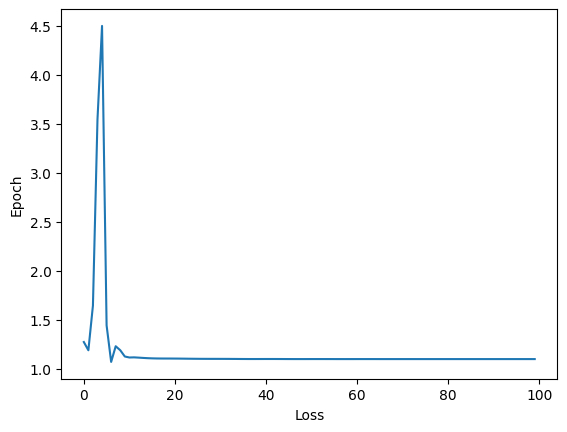

In [41]:
plt.plot(range(EPOCHS), losses_numpy)
plt.xlabel("Loss")
plt.ylabel("Epoch")